In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## GLEAM

In [2]:
GLEAM_10k_GMD_fo = 'output/Elbe/evaluated_timeseries_GLEAM_Elbe_10k_GMD.csv'
GLEAM_10k_fo = 'output/Elbe/evaluated_timeseries_GLEAM_Elbe_10k.csv'
GLEAM_1k_fo =  'output/Elbe/evaluated_timeseries_GLEAM_Elbe_1k.csv'

In [3]:
GLEAM_10k_GMD = pd.read_csv(GLEAM_10k_GMD_fo, index_col=0)
GLEAM_10k = pd.read_csv(GLEAM_10k_fo, index_col=0)
GLEAM_1k  = pd.read_csv(GLEAM_1k_fo, index_col=0)

In [4]:
GLEAM_10k_GMD = GLEAM_10k_GMD.dropna()
GLEAM_10k = GLEAM_10k.dropna()
GLEAM_1k = GLEAM_1k.dropna()

In [5]:
GLEAM_10k_GMD.set_index(pd.to_datetime(GLEAM_10k_GMD.index), inplace=True)
GLEAM_10k.set_index(pd.to_datetime(GLEAM_10k.index), inplace=True)
GLEAM_1k.set_index(pd.to_datetime(GLEAM_1k.index), inplace=True)

In [6]:
GLEAM_10k_GMD = GLEAM_10k_GMD.rename(columns={'E':'GLEAM', 'total_evaporation': 'PCR-GLOBWB'})

In [7]:
idx_min = min(GLEAM_10k_GMD.index.values.min(), GLEAM_10k.index.values.min(), GLEAM_1k.index.values.min())
idx_max = min(GLEAM_10k_GMD.index.values.max(), GLEAM_10k.index.values.max(), GLEAM_1k.index.values.max())

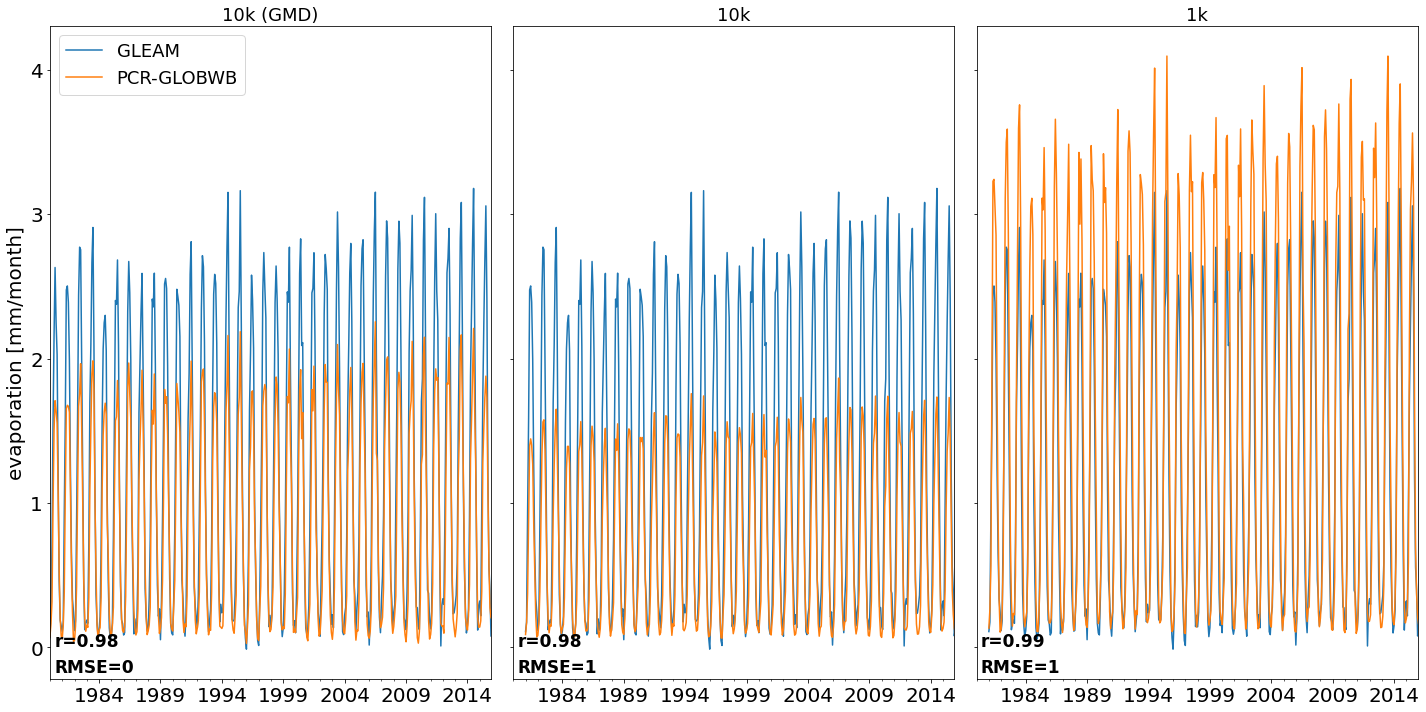

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10), sharey=True)

GLEAM_10k_GMD.plot(ax=ax1)
GLEAM_10k.plot(ax=ax2, legend=None)
GLEAM_1k.plot(ax=ax3, legend=None)

ax1.legend(loc="upper left", fontsize=18)

ax1.set_title('10k (GMD)', fontsize=18)
ax2.set_title('10k', fontsize=18)
ax3.set_title('1k', fontsize=18)

ax1.set_ylabel('evaporation [mm/month]', fontsize=20)

for ax, r, rmse in zip([ax1, ax2, ax3], [0.98, 0.98, 0.99], [0, 1, 1]):
    ax.set_xlim(idx_min, idx_max)
    ax.tick_params(labelsize=20)
    ax.text(0.01, 0.05, 'r={}'.format(r), fontsize=17, fontweight='bold', transform=ax.transAxes)
    ax.text(0.01, 0.01, 'RMSE={}'.format(rmse), fontsize=17, fontweight='bold', transform=ax.transAxes)

plt.tight_layout()

plt.savefig('figs/comparison_Elbe_GLEAM.png', dpi=300, bbox_inches='tight')

## GRACE

In [9]:
GRACE_10k_GMD_fo = 'output/Elbe/evaluated_timeseries_GRACE_Elbe_10k_GMD.csv'
GRACE_10k_fo = 'output/Elbe/evaluated_timeseries_GRACE_Elbe_10k.csv'
GRACE_1k_fo =  'output/Elbe/evaluated_timeseries_GRACE_Elbe_1k.csv'

In [10]:
GRACE_10k_GMD = pd.read_csv(GRACE_10k_GMD_fo, index_col=0)
GRACE_10k = pd.read_csv(GRACE_10k_fo, index_col=0)
GRACE_1k  = pd.read_csv(GRACE_1k_fo, index_col=0)

In [11]:
GRACE_10k_GMD = GRACE_10k_GMD.dropna()
GRACE_10k = GRACE_10k.dropna()
GRACE_1k = GRACE_1k.dropna()

In [12]:
GRACE_10k_GMD.set_index(pd.to_datetime(GRACE_10k_GMD.index), inplace=True)
GRACE_10k.set_index(pd.to_datetime(GRACE_10k.index), inplace=True)
GRACE_1k.set_index(pd.to_datetime(GRACE_1k.index), inplace=True)

In [13]:
GRACE_10k_GMD = GRACE_10k_GMD.rename(columns={'lwe_thickness':'GRACE', 'total_thickness_of_water_storage': 'PCR-GLOBWB'})

In [14]:
idx_min = min(GRACE_10k_GMD.index.values.min(), GRACE_10k.index.values.min(), GRACE_1k.index.values.min())
idx_max = min(GRACE_10k_GMD.index.values.max(), GRACE_10k.index.values.max(), GRACE_1k.index.values.max())

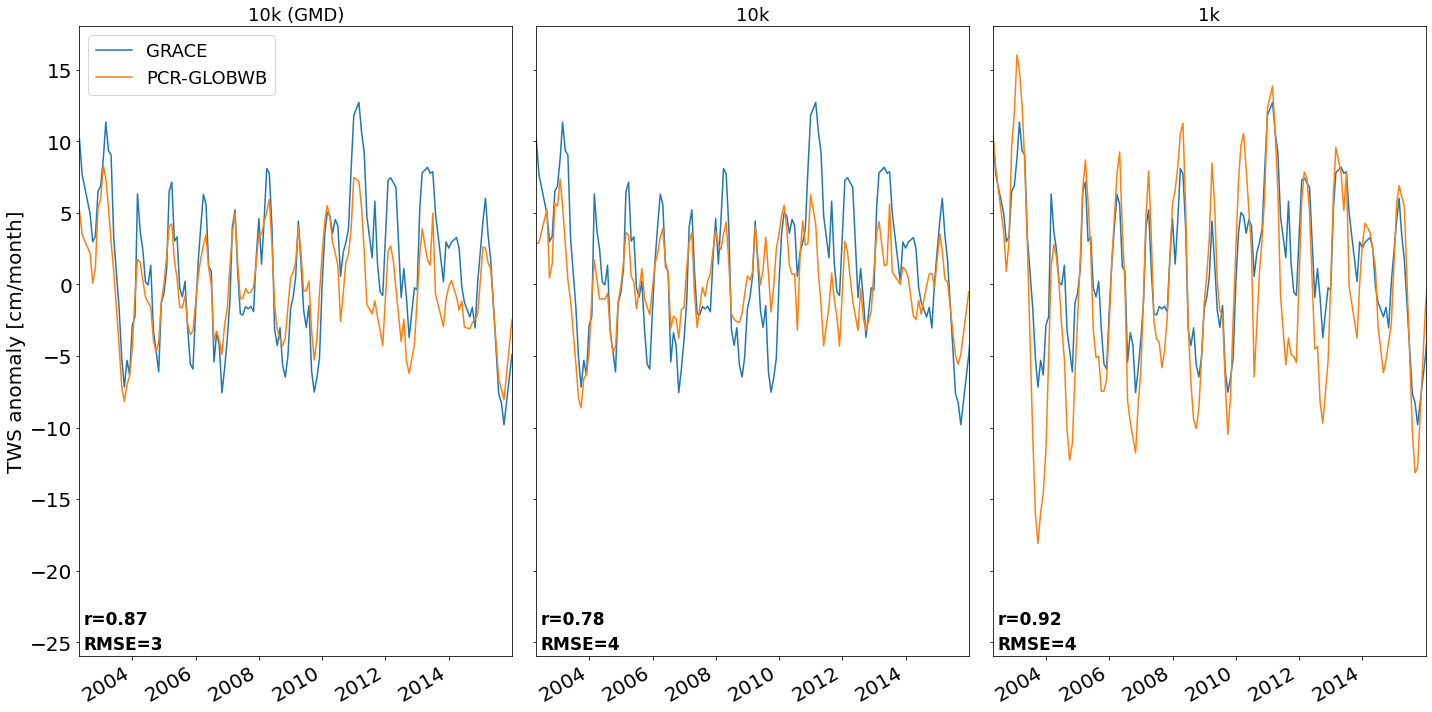

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10), sharey=True)

GRACE_10k_GMD.plot(ax=ax1)
GRACE_10k.plot(ax=ax2, legend=None)
GRACE_1k.plot(ax=ax3, legend=None)

ax1.set_ylabel('TWS anomaly [cm/month]', fontsize=20)

ax1.legend(loc="upper left", fontsize=18)

ax1.set_title('10k (GMD)', fontsize=18)
ax2.set_title('10k', fontsize=18)
ax3.set_title('1k', fontsize=18)

for ax, r, rmse in zip([ax1, ax2, ax3], [0.87, 0.78, 0.92], [3, 4, 4]):
    ax.set_xlim(idx_min, idx_max)
    ax.tick_params(labelsize=20)
    ax.text(0.01, 0.05, 'r={}'.format(r), fontsize=17, fontweight='bold', transform=ax.transAxes)
    ax.text(0.01, 0.01, 'RMSE={}'.format(rmse), fontsize=17, fontweight='bold', transform=ax.transAxes)

plt.tight_layout()

plt.savefig('figs/comparison_Elbe_GRACE.png', dpi=300, bbox_inches='tight')

## GRDC

In [16]:
GRDC_10k_GMD_fo = 'output/Elbe/evaluated_timeseries_GRDC_Elbe_10k_GMD.csv'
GRDC_10k_fo = 'output/Elbe/evaluated_timeseries_GRDC_Elbe_10k.csv'
GRDC_1k_fo =  'output/Elbe/evaluated_timeseries_GRDC_Elbe_1k.csv'

In [17]:
GRDC_10k_GMD = pd.read_csv(GRDC_10k_GMD_fo, index_col=0)
GRDC_10k = pd.read_csv(GRDC_10k_fo, index_col=0)
GRDC_1k  = pd.read_csv(GRDC_1k_fo, index_col=0)

In [18]:
GRDC_1k = GRDC_1k.rename(columns={'Q$sim$ PCR-GLOBWB (1km)':'Q$sim$ PCR-GLOBWB (1k)'})

In [19]:
GRDC_1k['Q$sim$ PCR-GLOBWB (10k)'] = GRDC_10k['Q$sim$ PCR-GLOBWB (1km)']
GRDC_1k['Q$sim$ PCR-GLOBWB (10k GMD)'] = GRDC_10k_GMD['Q$sim$ PCR-GLOBWB (1km)']

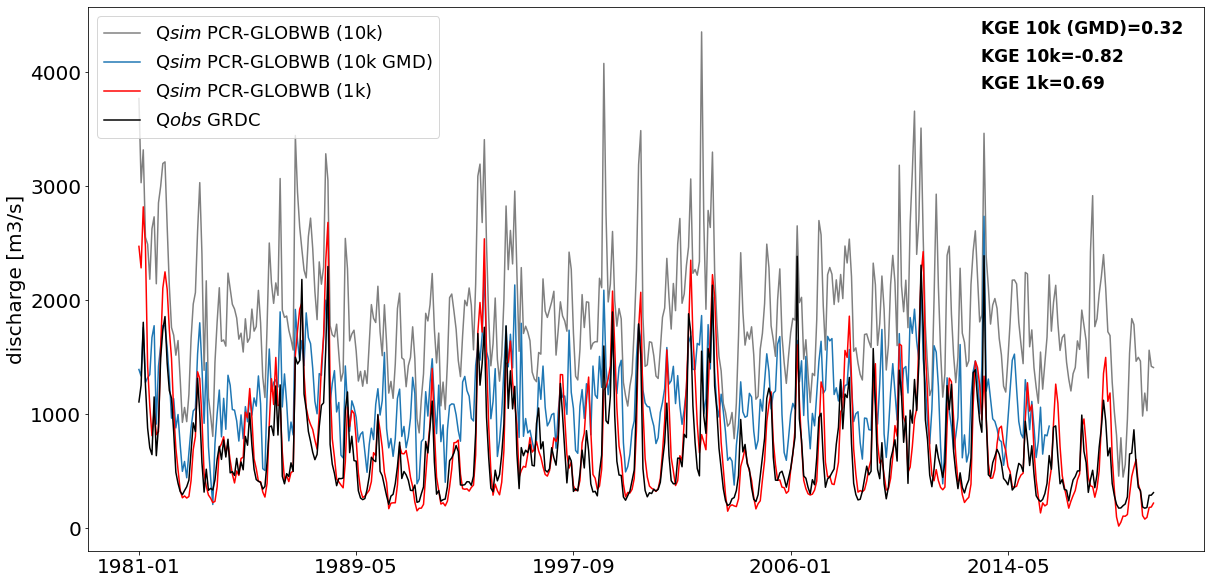

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
GRDC_1k['Q$sim$ PCR-GLOBWB (10k)'].plot(ax=ax, color='grey', legend=True)
GRDC_1k['Q$sim$ PCR-GLOBWB (10k GMD)'].plot(ax=ax, legend=True)
GRDC_1k['Q$sim$ PCR-GLOBWB (1k)'].plot(ax=ax, color='r', legend=True)
GRDC_1k['Q$obs$ GRDC'].plot(ax=ax, color='k', legend=True)

ax.set_ylabel('discharge [m3/s]', fontsize=20)

ax.legend(loc="upper left", fontsize=18)

ax.tick_params(labelsize=20)
    
ax.text(0.8, 0.95, 'KGE 10k (GMD)=0.32'.format(rmse), fontsize=17, fontweight='bold', transform=ax.transAxes)
ax.text(0.8, 0.9, 'KGE 10k=-0.82'.format(rmse), fontsize=17, fontweight='bold', transform=ax.transAxes)
ax.text(0.8, 0.85, 'KGE 1k=0.69'.format(rmse), fontsize=17, fontweight='bold', transform=ax.transAxes)
    
plt.savefig('figs/comparison_Elbe_GRDC.png', dpi=300, bbox_inches='tight')